# Processing the IR dataset

In [1]:
from spectrochempy.api import *
options.log_level=WARN


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


We read the .scp saved previously

In [2]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

for key, sample in samples.items():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    filename = basename + '.scp'
    sample['IR'] = NDDataset.read( filename)

We will resize the data in the interesting region of wavenumbers

In [3]:
for sample in samples.values():
    
    s = sample['IR'] 
    
    # reduce to a useful windoww of wavenumbers
    W = (1290., 3990.)  
    sw = s[:,W[0]:W[1]]
    
    sample['IR'] = sw # the slicing was not done inplace, let's store this change

<IPython.core.display.Javascript object>


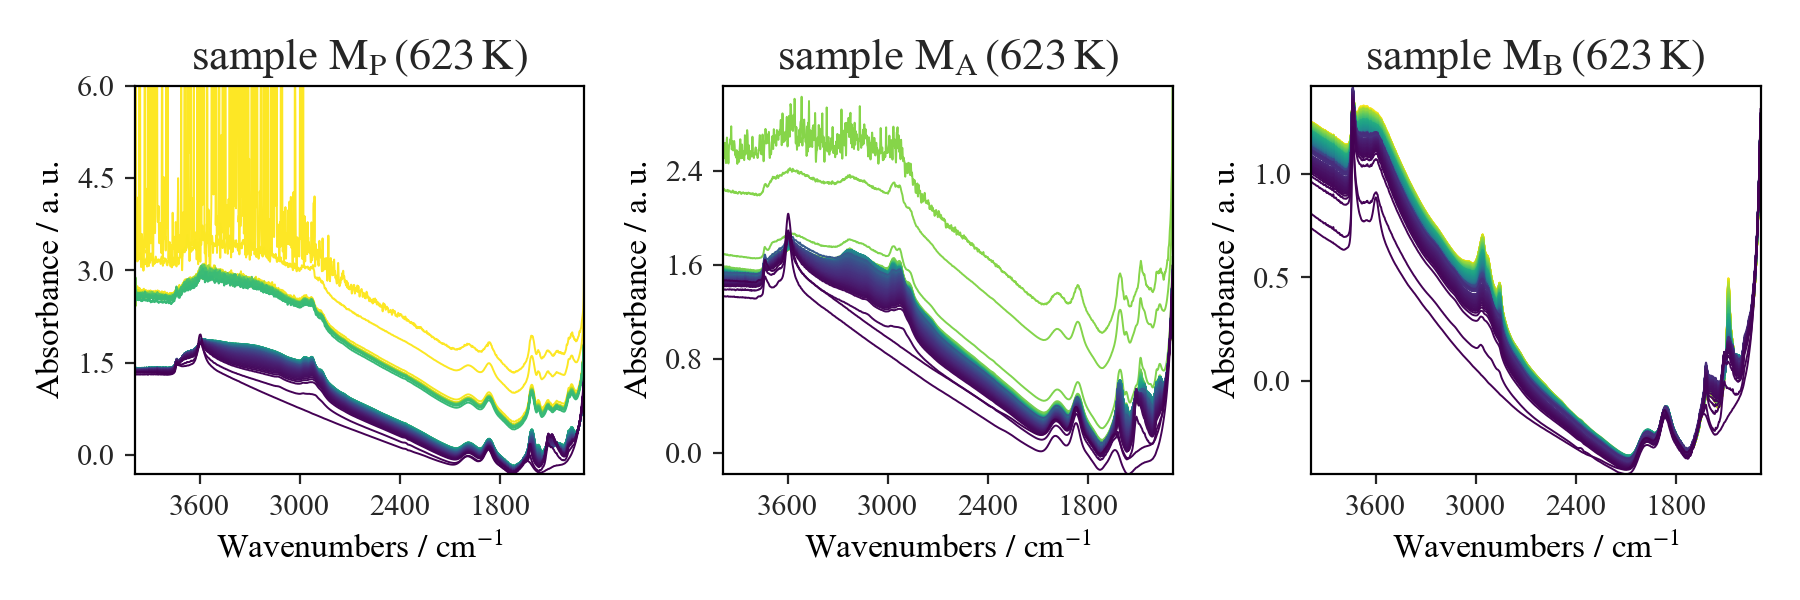

In [4]:
axes = subplots(nrow=1, ncol=3, figsize=(9,3))

for ax, sample in zip(axes.values(), samples.values()):
    s = sample['IR']
    s.plot_stack(ax=ax, colorbar=False, hold=True)
    label = sample['label']
    title = 'sample {}'.format(label)
    ax.set_title(title, fontsize=16)

## Masking bad data

<IPython.core.display.Javascript object>


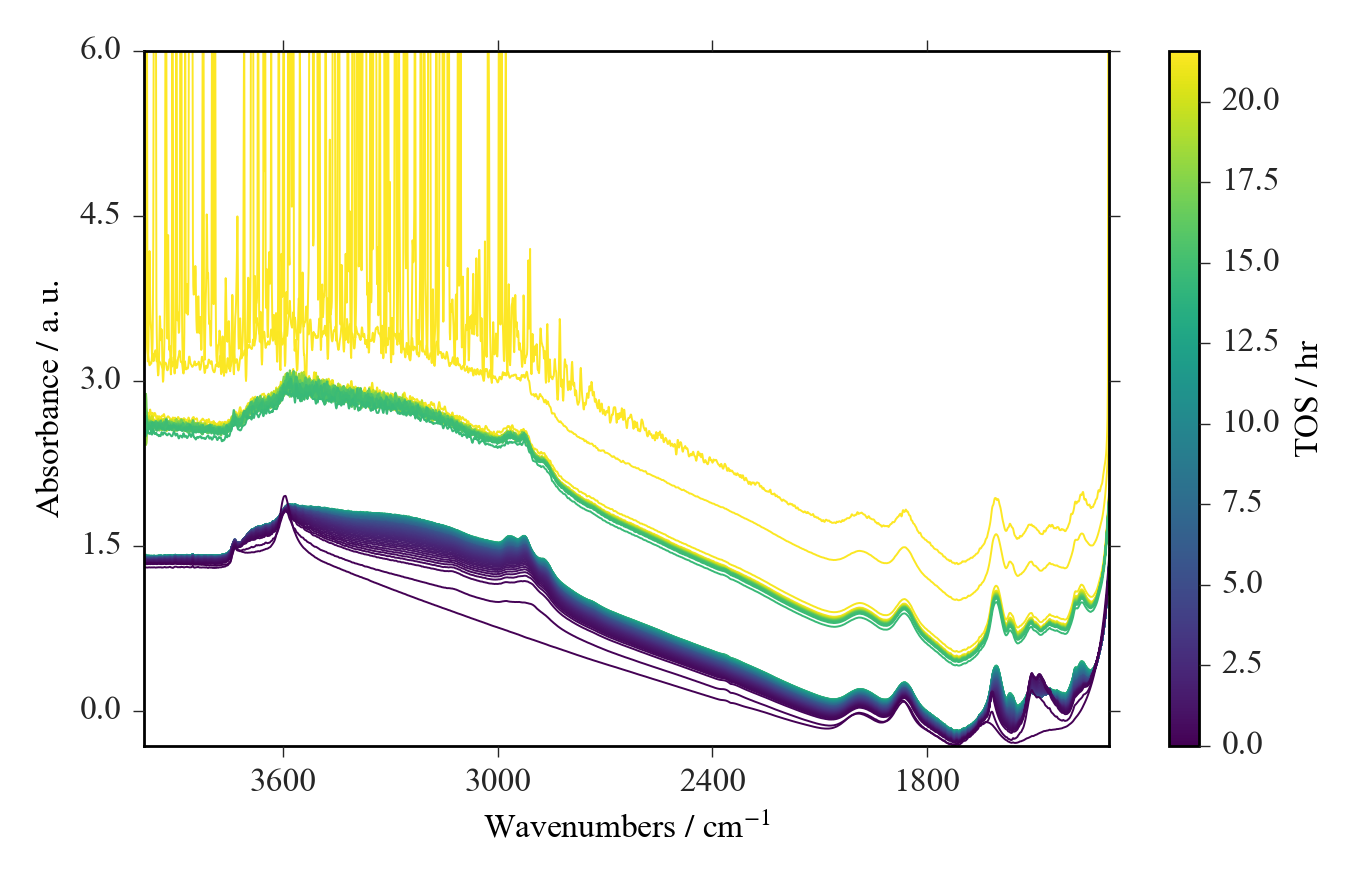

True

In [5]:
s= samples['P350']['IR'].copy() # copy it so we will not make any damage to the original data
s.y -= s.y[0]  # remove offset to axe y 
s.y.to('hour')
s.y.title = 'TOS'
s.plot_stack()

Clearly the lasts spectra have problem with noise. Let's mask them. 

<IPython.core.display.Javascript object>


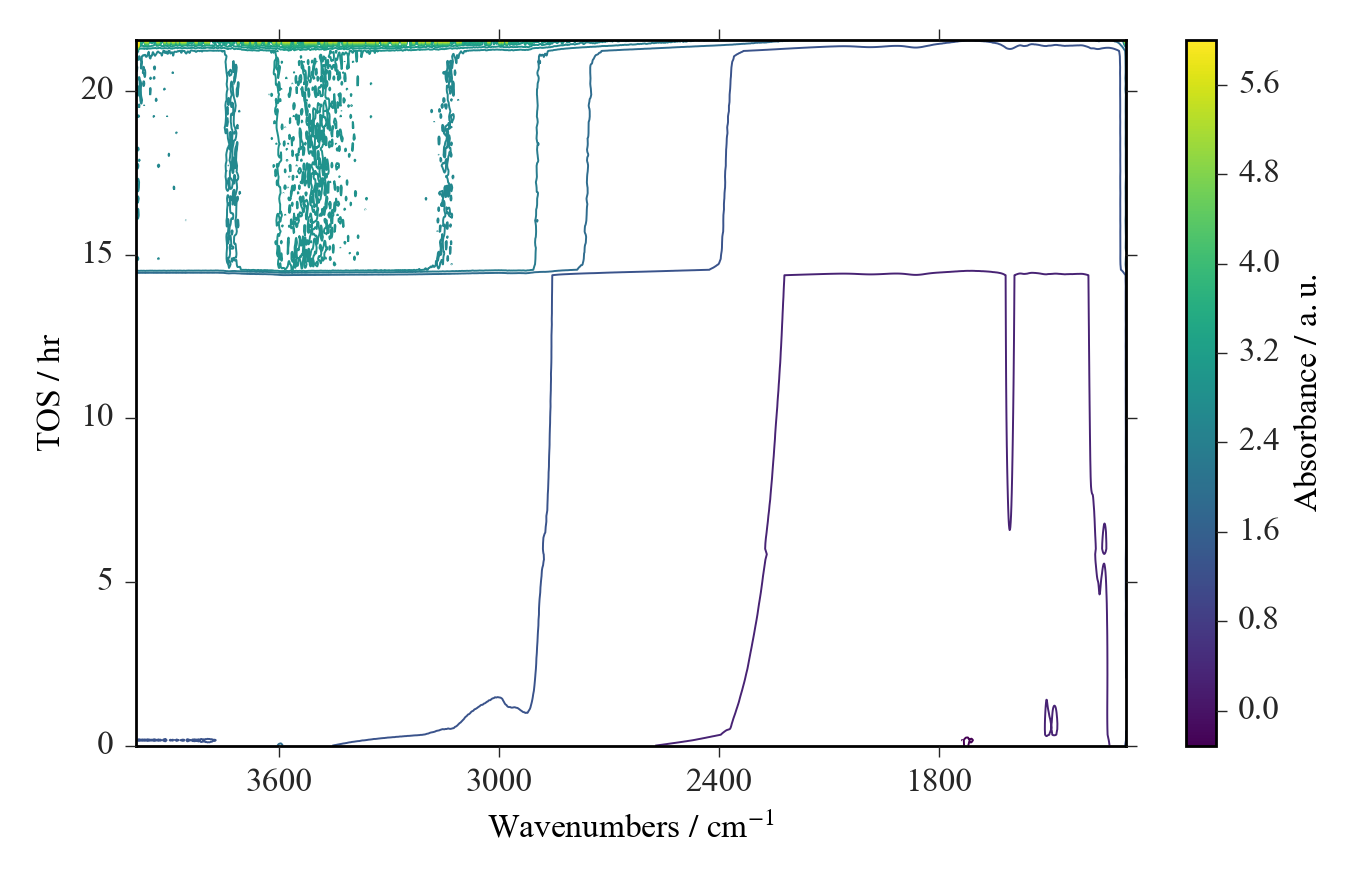

In [6]:
s[14.5:60]=masked
s.plot()